# Exercise 2: Data Processing and Analysis

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    import otter 
    grader = otter.Notebook()
     
except:
    !pip install otter-grader
    import otter
    grader = otter.Notebook()
    

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [3]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [4]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())


40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [5]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = smartwatch['Heart Rate (BPM)'].max()

print(minimumHeartRate, maximumHeartRate)

40.0 296.5939695131042


In [6]:
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [7]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

len(outlierHeartRaterows) + len(nullHeartRaterows)

450

In [8]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]

heartrateRows

print(heartrateRows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
3      

**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [9]:
HeartRateMean = heartrateRows['Heart Rate (BPM)'].mean()

HeartRateMean

print(HeartRateMean)


75.13268404820141


In [10]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


outlierHeartRaterows

/tmp/ipykernel_1670/2138589342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_1670/2138589342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,ERROR,Highly Active,5
337,2369.0,75.132684,95.441773,2998.761919,6.670622263019579,Highly Active,9
393,2443.0,75.132684,95.497181,1227.804688,5.185244686595328,Highly_Active,9
403,3200.0,75.132684,96.011492,9402.746140,7.190062873693008,Highly_Active,9
595,2129.0,75.132684,97.161853,2555.402184,5.928628388578222,Highly Active,7
649,2008.0,75.132684,98.356789,2739.171166,7.272009723254014,Highly_Active,NaN
818,3156.0,75.132684,NaN,7281.778831,4.300171191258864,Sedentary,3
1195,3261.0,75.132684,99.652006,2867.872064,7.218530947169898,Active,7
1391,4621.0,75.132684,96.688083,20577.677290,8.049854248644627,Active,3
1602,4737.0,75.132684,95.095839,16072.283561,6.98847026102848,Actve,6


In [11]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = smartwatch_hr['Heart Rate (BPM)'].mean 
fullTableHRMean

print(fullTableHRMean)

<bound method Series.mean of 2       75.132684
337     75.132684
393     75.132684
403     75.132684
595     75.132684
          ...    
9994    77.912299
9995    78.819386
9996    48.632659
9997    73.834442
9999    70.063864
Name: Heart Rate (BPM), Length: 10000, dtype: float64>


In [12]:
grader.check('q2')

Question 2 results:
    Question 2 - 1 result:
        ❌ Test case failed
        Trying:
            bool((HeartRateMean == 75.13268404820141) or (HeartRateMean == np.float64(75.13268404820141)))
        Expecting:
            True
        ok
        Trying:
            HeartRateMean == fullTableHRMean
        Expecting:
            True
        **********************************************************************
        Line 5, in Question 2 0
        Failed example:
            HeartRateMean == fullTableHRMean
        Expected:
            True
        Got:
            False

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

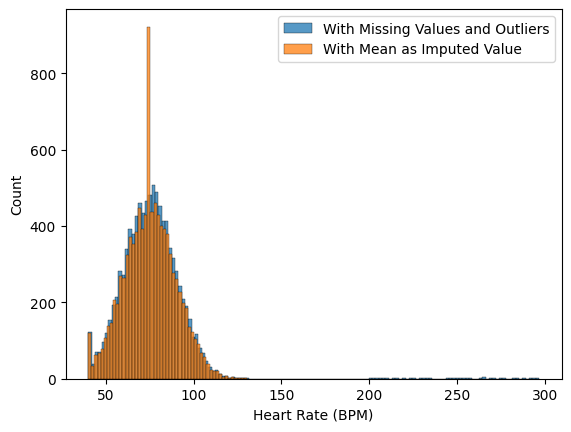

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()



**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: 

Imputing with the mean does not really affect the mean. Sometimes,it can shift the median, especially in when the distribution of data is in such a way that  large number of values are missing.
This can lead to misleading interpretations of the data’s central tendency.

In [14]:
## coding cell to check the difference in median values 

print(smartwatch['Heart Rate (BPM)'].median(), smartwatch_hr['Heart Rate (BPM)'].median())



75.22060125775644 75.13268404820141


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [15]:
minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()

maxBloodO2 = smartwatch['Blood Oxygen Level (%)'].max()

meanBloodO2 = smartwatch['Blood Oxygen Level (%)'].mean()

minBloodO2, maxBloodO2, meanBloodO2

(np.float64(90.79120814564097),
 np.float64(100.0),
 np.float64(97.84158102099076))

In [16]:
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

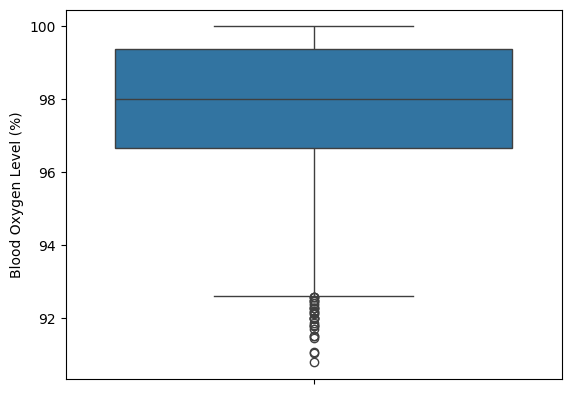

In [17]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: 
I only kept blood oxygen levels that were less than 95%. This is because that's the normal range for oxygen level in the blood. 

In [ ]:
## use this space or additional cells to deal with the missing/outlier values. 


smartwatch_o2 = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'] < 95]

smartwatch_o2 

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
3113,1035.0,75.132684,94.120618,5303.010562,5.216491298730846,Active,4
5170,2023.0,75.132684,94.316370,789.259057,4.456316515329178,NaN,6
6974,1935.0,75.132684,94.263021,25043.512031,5.452934114413052,Highly_Active,6
7897,3488.0,75.132684,93.422300,1167.050964,6.3843230507913775,Actve,7
865,4398.0,75.132684,94.919278,9685.124268,8.253366901602408,Highly Active,7
...,...,...,...,...,...,...,...
9908,2469.0,65.113348,94.633900,6098.158365,8.224708822075373,Seddentary,1
9918,3973.0,71.494501,94.599712,187.412893,7.39792497733388,Active,4
9920,4988.0,77.209471,94.069091,27146.993541,4.500502811774748,Seddentary,10
9946,4865.0,63.395581,94.186810,5554.250999,6.673664037737879,Sedentary,4


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [19]:
minSteps = smartwatch['Step Count'].min()

maxSteps = smartwatch['Step Count'].max()

meanSteps = smartwatch['Step Count'].mean()

minSteps, maxSteps, meanSteps

(np.float64(0.9101380609604088),
 np.float64(62486.690753464914),
 np.float64(6985.685884992229))

In [20]:
grader.check('q6')

Question 6 results: All test cases passed!

In [21]:
smartwatch_o2['Step Count']



3113     5303.010562
5170      789.259057
6974    25043.512031
7897     1167.050964
865      9685.124268
            ...     
9908     6098.158365
9918      187.412893
9920    27146.993541
9946     5554.250999
9972      164.026524
Name: Step Count, Length: 646, dtype: float64

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: 

I rounded each step value to two decimal places. 

In [ ]:
## use this space or additional cells to address the missing or outlier data. 

def decimalPlace(value):
    return round(value, 2)

#smartwatch_o2['All_Integers'] = smartwatch_o2.apply(lambda row: row.map(lambda x: isinstance(x, int)).all(), axis=1) # i wanted to use an outlier that removed all strings so I searched for help on ChatGPT
smartwatch_steps = smartwatch_o2
smartwatch_steps['Step Count'] = smartwatch_steps['Step Count'].apply(decimalPlace) #lambda x: isinstance(x, (int, float)) and x.is_integer())] # I had the idea in my mind but I got help from ChatGPT

smartwatch_steps



/tmp/ipykernel_1670/999665648.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatch_steps['Step Count'] = smartwatch_steps['Step Count'].apply(decimalPlace) #lambda x: isinstance(x, (int, float)) and x.is_integer())] # I had the idea in my mind but I got help from ChatGPT


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
3113,1035.0,75.132684,94.120618,5303.01,5.216491298730846,Active,4
5170,2023.0,75.132684,94.316370,789.26,4.456316515329178,NaN,6
6974,1935.0,75.132684,94.263021,25043.51,5.452934114413052,Highly_Active,6
7897,3488.0,75.132684,93.422300,1167.05,6.3843230507913775,Actve,7
865,4398.0,75.132684,94.919278,9685.12,8.253366901602408,Highly Active,7
...,...,...,...,...,...,...,...
9908,2469.0,65.113348,94.633900,6098.16,8.224708822075373,Seddentary,1
9918,3973.0,71.494501,94.599712,187.41,7.39792497733388,Active,4
9920,4988.0,77.209471,94.069091,27146.99,4.500502811774748,Seddentary,10
9946,4865.0,63.395581,94.186810,5554.25,6.673664037737879,Sedentary,4


Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [23]:
minSleep = smartwatch['Sleep Duration (hours)'].min()

minSleep

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [ ]:
for data in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(data)  ## first try to see if it can be converted to a number
    except:
        print(smartwatch)  ## if it can't be converted print it to screen 

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
1         NaN               NaN               98.532195    727.601610   
2      1860.0        247.803052               97.052954   2826.521994   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
...       ...               ...                     ...           ...   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9998   4907.0               NaN               98.401058   3364.788855   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
1      

So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [ ]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
6800,4020.0,75.132684,94.976981,7780.54,ERROR,Seddentary,5
9335,4440.0,75.132684,93.548528,17475.47,ERROR,Active,5
71,3041.0,64.799778,94.743857,4613.86,ERROR,Highly_Active,10
142,3695.0,81.902957,94.540697,3301.13,ERROR,Highly Active,4
1052,1684.0,48.220863,93.977123,3323.68,ERROR,Active,7
1946,2040.0,60.707641,94.984917,16208.49,ERROR,Seddentary,3
3806,3528.0,77.916918,94.812034,9670.60,ERROR,Active,3
4123,2014.0,67.996096,93.197882,4869.70,ERROR,Highly_Active,2
4732,3172.0,44.564677,93.509192,26162.25,ERROR,Seddentary,3
4981,1187.0,80.978300,94.933598,27702.83,ERROR,Sedentary,3


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [ ]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_1963/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
6800,4020.0,75.132684,94.976981,7780.54,NaN,Seddentary,5
9335,4440.0,75.132684,93.548528,17475.47,NaN,Active,5
71,3041.0,64.799778,94.743857,4613.86,NaN,Highly_Active,10
142,3695.0,81.902957,94.540697,3301.13,NaN,Highly Active,4
1052,1684.0,48.220863,93.977123,3323.68,NaN,Active,7
1946,2040.0,60.707641,94.984917,16208.49,NaN,Seddentary,3
3806,3528.0,77.916918,94.812034,9670.60,NaN,Active,3
4123,2014.0,67.996096,93.197882,4869.70,NaN,Highly_Active,2
4732,3172.0,44.564677,93.509192,26162.25,NaN,Seddentary,3
4981,1187.0,80.978300,94.933598,27702.83,NaN,Sedentary,3


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [ ]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

/tmp/ipykernel_1963/1089028424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
3113,1035.0,75.132684,94.120618,5303.01,5.216491,Active,4
5170,2023.0,75.132684,94.316370,789.26,4.456317,NaN,6
6974,1935.0,75.132684,94.263021,25043.51,5.452934,Highly_Active,6
7897,3488.0,75.132684,93.422300,1167.05,6.384323,Actve,7
865,4398.0,75.132684,94.919278,9685.12,8.253367,Highly Active,7
...,...,...,...,...,...,...,...
9908,2469.0,65.113348,94.633900,6098.16,8.224709,Seddentary,1
9918,3973.0,71.494501,94.599712,187.41,7.397925,Active,4
9920,4988.0,77.209471,94.069091,27146.99,4.500503,Seddentary,10
9946,4865.0,63.395581,94.186810,5554.25,6.673664,Sedentary,4


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [ ]:
minSleep = smartwatch_sleep['Sleep Duration (hours)'].min()

maxSleep = smartwatch_sleep['Sleep Duration (hours)'].max()

meanSleep = smartwatch_sleep['Sleep Duration (hours)'].mean()

minSleep, maxSleep, meanSleep

(np.float64(1.7060873342734366),
 np.float64(10.51452875618417),
 np.float64(6.466570478298619))

In [ ]:
grader.check('q8')

Question 8 results:
    Question 8 - 1 result:
        ❌ Test case failed
        Trying:
            bool((minSleep == -0.1944527906201543) or (minSleep == np.float64(-0.1944527906201543)))
        Expecting:
            True
        **********************************************************************
        Line 3, in Question 8 0
        Failed example:
            bool((minSleep == -0.1944527906201543) or (minSleep == np.float64(-0.1944527906201543)))
        Expected:
            True
        Got:
            False
        Trying:
            bool((maxSleep == 12.140232872862926) or (maxSleep == np.float64(12.140232872862926)))
        Expecting:
            True
        **********************************************************************
        Line 5, in Question 8 0
        Failed example:
            bool((maxSleep == 12.140232872862926) or (maxSleep == np.float64(12.140232872862926)))
        Expected:
            True
        Got:
            False
        Trying:
            bool((meanSleep ==  6.505462918406444) or (meanSleep == np.float64(6.505462918406444)))
        Expecting:
            True
        **********************************************************************
        Line 7, in Question 8 0
        Failed example:
            bool((meanSleep ==  6.505462918406444) or (meanSleep == np.float64(6.505462918406444)))
        Expected:
            True
        Got:
            False

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: 

I replaced the missing and outlier values by keeping only values that were greater than 2. Also, I converted all the string values into numeric values. 


In [ ]:
## use this space or additional cells to address the missing or outlier data. 


# Example cleaning: Remove rows with missing or invalid sleep durations
smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')
smartwatch_updated_sleep = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'] > 2]


/tmp/ipykernel_1963/1557095562.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')


We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [ ]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

nan
Very High


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: 

I took out all the stress levels that were labeled as 'Very High' instead of a number into another table (errorTable2). These string values were replaced with the mean of the the doriginal data table. Also
some of the data even though apperaing as numbers were actually inputed as strings.
So those were also cahnged to numbers and the rows with NaN were dropped. 

In [ ]:
# questions 3,5,7 , 9 explain what you did in words. 

errorTable2 = smartwatch_sleep[smartwatch_sleep['Stress Level'] == 'Very High']

errorTable2


non_veryhigh_values = smartwatch_sleep[smartwatch_sleep['Stress Level'] != 'Very High']

non_veryhigh_values['Stress Level'].unique()

meanStressLevel = non_veryhigh_values['Stress Level'].dropna().astype(int).mean()
errorTable2['Stress Level']= meanStressLevel

errorTable2

smartwatch_stress= pd.concat([errorTable2,non_veryhigh_values])

smartwatch_stress

/tmp/ipykernel_1963/1519744264.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable2['Stress Level']= meanStressLevel


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
3321,1845.0,48.814491,94.897978,6169.21,6.019077,Active,5.503925
3113,1035.0,75.132684,94.120618,5303.01,5.216491,Active,4
5170,2023.0,75.132684,94.316370,789.26,4.456317,NaN,6
6974,1935.0,75.132684,94.263021,25043.51,5.452934,Highly_Active,6
7897,3488.0,75.132684,93.422300,1167.05,6.384323,Actve,7
...,...,...,...,...,...,...,...
9908,2469.0,65.113348,94.633900,6098.16,8.224709,Seddentary,1
9918,3973.0,71.494501,94.599712,187.41,7.397925,Active,4
9920,4988.0,77.209471,94.069091,27146.99,4.500503,Seddentary,10
9946,4865.0,63.395581,94.186810,5554.25,6.673664,Sedentary,4


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [ ]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [ ]:
# Group: Highly Active
highlyActive = smartwatch_stress[
    (smartwatch_stress['Activity Level'] == 'Very Active') |
    (smartwatch_stress['Activity Level'] == 'Highly Active')
]
highlyActive['Activity Level'] = 'Highly Active'
highlyActive['NumActivity'] = 1

# Group: Active
active = smartwatch_stress[
    (smartwatch_stress['Activity Level'] == 'Fairly Active') |
    (smartwatch_stress['Activity Level'] == 'Active')
]
active['Activity Level'] = 'Active'
active['NumActivity'] = 2

# Group: Sedentary
sedentary = smartwatch_stress[
    (smartwatch_stress['Activity Level'] == 'Lightly Active') |
    (smartwatch_stress['Activity Level'] == 'Sedentary')
]
sedentary['Activity Level'] = 'Sedentary'
sedentary['NumActivity'] = 3

# Combine all cleaned rows
final_table = pd.concat([
    highlyActive,
    active,
    sedentary,
    smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]  # keep nulls if any
])

final_table


/tmp/ipykernel_1963/3065003085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'Highly Active'
/tmp/ipykernel_1963/3065003085.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1
/tmp/ipykernel_1963/3065003085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity
865,4398.0,75.132684,94.919278,9685.12,8.253367,Highly Active,7,1.0
1353,3187.0,75.132684,94.361126,13400.38,6.055519,Highly Active,5,1.0
3920,1581.0,75.132684,94.890491,3834.35,5.295034,Highly Active,8,1.0
3984,4062.0,75.132684,94.148614,15732.27,5.838451,Highly Active,8,1.0
5016,4965.0,75.132684,94.746233,487.97,8.227377,Highly Active,1,1.0
...,...,...,...,...,...,...,...,...
389,4991.0,89.812696,92.003999,3197.92,6.867674,NaN,7,NaN
857,4719.0,76.921288,94.625199,4733.64,5.314094,NaN,5,NaN
1506,4767.0,71.816154,93.929227,1284.26,7.809793,NaN,2,NaN
2232,2312.0,63.759878,94.309291,5840.23,7.315171,NaN,4,NaN


Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [ ]:
final_table.isnull().sum()

User ID                   10
Heart Rate (BPM)           0
Blood Oxygen Level (%)     0
Step Count                 1
Sleep Duration (hours)    11
Activity Level             6
Stress Level               5
NumActivity                6
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [ ]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 865 to 9530
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 348 non-null    float64
 1   Heart Rate (BPM)        358 non-null    float64
 2   Blood Oxygen Level (%)  358 non-null    float64
 3   Step Count              357 non-null    float64
 4   Sleep Duration (hours)  347 non-null    float64
 5   Activity Level          352 non-null    object 
 6   Stress Level            353 non-null    object 
 7   NumActivity             352 non-null    float64
dtypes: float64(6), object(2)
memory usage: 25.2+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER:

In my X axis , I changed all the heart rate values that were out of range by replacing them with the mean. Hence, you see a trend of a cluster of points around the mean which are all the representation of the replaced values. 



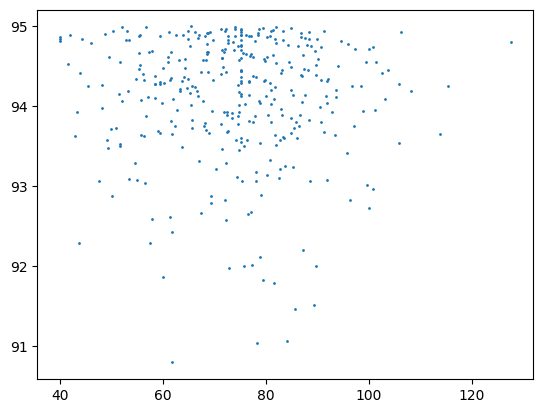

In [ ]:
plt.scatter(final_table['Heart Rate (BPM)'], final_table['Blood Oxygen Level (%)'], s=1)




**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER:

The first figure without the NaN values included shows a less denser distribution with a false trend of figures lying at close to the mean. The diagram with the NaN values shows a denser distribution 
and a more and vertically broader distribution. This means that when we keep  NaN Values and don't handle them properly, we can distort the visual interpretations. But also replacing them with other values such as mean or 0 can
potentially lead to misleading patterns.


In [ ]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

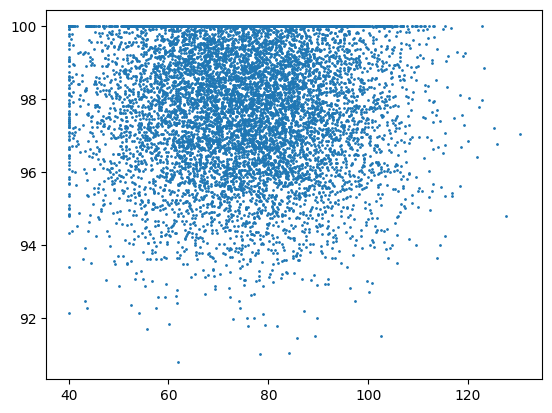

In [ ]:
plt.scatter(nanTable['Heart Rate (BPM)'], nanTable['Blood Oxygen Level (%)'], s = 1)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

The steps only differ in terms of outliers but the median lies at nearly the same place at a close range for the different ativity level 
All three groups have similar medians, that lie around in a relatively close range.
There is also some overlap in the interquartile range which suggests that the majority of step counts for all groups are fairly similar.



Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<Axes: xlabel='Activity Level', ylabel='Step Count'>

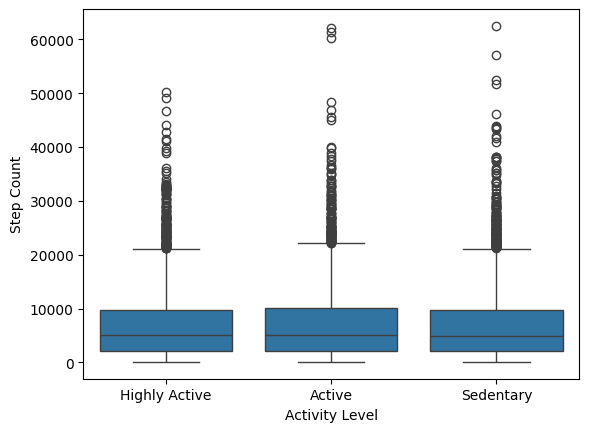

In [ ]:
## Visualization 

sns.boxplot(data=nanTable, x='Activity Level', y='Step Count' )



In [ ]:
from scipy.stats import f_oneway
## if you get nan values you can use .dropna() to remove nan values 

## create a table for each activity level group
sed = nanTable[nanTable['NumActivity'] == 3]  ## sedentary rows
act = nanTable[nanTable['NumActivity'] ==2] ## active rows
hact =  nanTable[nanTable['NumActivity'] ==1] ## highly active rows 

stat, pval = f_oneway(sed['Step Count'].dropna(), act['Step Count'].dropna(), hact['Step Count'].dropna())


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.176, p-value: 0.838


Is there significant difference between the groups' step counts?  

ANSWER:

There is not much difference between the step counts of this group looking at the p value oof 0.838 which confirms there is not much of a difference between them. 

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER:

The analysis of this data in the Sleep duration column shows that many users sleep less than the recommended 8 / hours per night.

I found that many heart rate readings centered around an average value, partly because missing data was filled in with that average. 
and show signs of elevated resting heart rate which is  a possible indicator of chronic stress or health risks. 
We must encourage some moderate daily activity as this is associated with better sleep and more stable heart health. 
The results from these smartwatch users and may not represent the entire population hence we cant firmly establish causality to any condition.
Hence they can be suggested accessible changes such as  daily walks or sleep than can have measurable health benefits.